In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns
#import magcolloids as mgc
from matplotlib.patches import Rectangle

#sys.path.insert(0, '../icenumerics')

#import icenumerics as ice

sys.path.insert(0, '../Scripts')
from importlib import reload  
import From_Cairo_to_Shakti as lattices
reload(lattices)

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

# Mimic experimental data

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-15.0"

In [3]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'MimicExperimentalData_CairoLattice_25mT-1000s_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)
    
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)
Cairo_exp.index.names = ['Exp', 'frame', 'id']

MimicExperimentalData_CairoLattice_25mT-1000s_exp31.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp47.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp34.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp29.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp3.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp44.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp7.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp43.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp42.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp22.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp20.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp25.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp33.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp12.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp4.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp14.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp41.dat
MimicExperimentalData_CairoLattice_25mT-1000s_exp32

Choose the same area analyzed than in experiments

In [4]:
frame0 = Cairo_exp.query('frame == 0')

In [5]:
x_min = 60
x_max = 200

y_min = -160
y_max = -10

In [6]:
Ca = frame0.loc[(frame0['x']<x_max) & (frame0['x']>x_min)]
frame0 = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

(63.245308173362076,
 201.4634346704313,
 -155.11183303432236,
 -16.887243529099685)

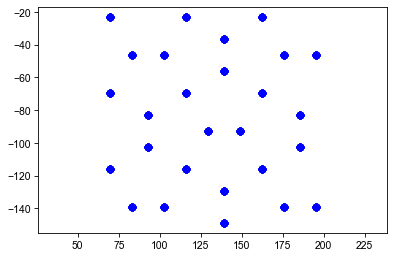

In [7]:
plt.plot(frame0.x, frame0.y , 'o')
plt.axis('equal')

In [8]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo = Ca.loc[(Ca['y']<y_max) & (Ca['y']>y_min)]

Classify vertices 

In [9]:
Cairo["type"] = np.NaN

# 4-fold vertices classification

Cairo.loc[Cairo.charge==-4, "type"] = "Q = -4"
Cairo.loc[Cairo.charge==-2, "type"] = "Q = -2"
Cairo.loc[Cairo.charge==+2, "type"] = "Q = +2"
Cairo.loc[Cairo.charge==+4, "type"] = "Q = +4"

zeroq = Cairo.charge==0

dipole_magnitude = np.sqrt(Cairo[zeroq].dx**2+Cairo[zeroq].dy**2)

Cairo.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo.loc[Cairo.charge==+1, "type"] = "Q = +1"
Cairo.loc[Cairo.charge==-1, "type"] = "Q = -1"
Cairo.loc[Cairo.charge==+3, "type"] = "Q = +3"
Cairo.loc[Cairo.charge==-3, "type"] = "Q = -3"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
Cairo = Cairo.query('coordination == 4 or coordination == 3')

Vertex count

In [11]:
def count_vertices(vrt, exp = 'Exp', column = "type", column1 = "coordination", time = "frame"):
    vrt_count = vrt.groupby([exp,time,column,column1]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values(exp).unique(),
        vrt_count.index.get_level_values(time).unique(),
        vrt_count.index.get_level_values(column).unique(),
        vrt_count.index.get_level_values(column1).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby([exp,time,column1]).sum()
    array_coord = total_vrt.loc[vrt_count.index.get_level_values('frame')].number.values
    array_coordT = np.tile(array_coord,int(len(vrt_count)/len(array_coord)))# 9 types of charges and 10 experiments 
    vrt_count["fraction"] = vrt_count.number / array_coordT
        
    return vrt_count

In [12]:
count_m = count_vertices(Cairo)

In [13]:
v_counts_m = count_m.groupby(["frame","type","coordination"]).mean()
v_counts_m["err"] = count_m['fraction'].groupby(["frame","type","coordination"]).std()/np.sqrt(count_m['fraction'].groupby(["frame","type","coordination"]).count().values)

In [14]:
v_counts_m = v_counts_m.query('number != 0')

In [15]:
v_counts_m['time'] = v_counts_m.index.get_level_values('frame')

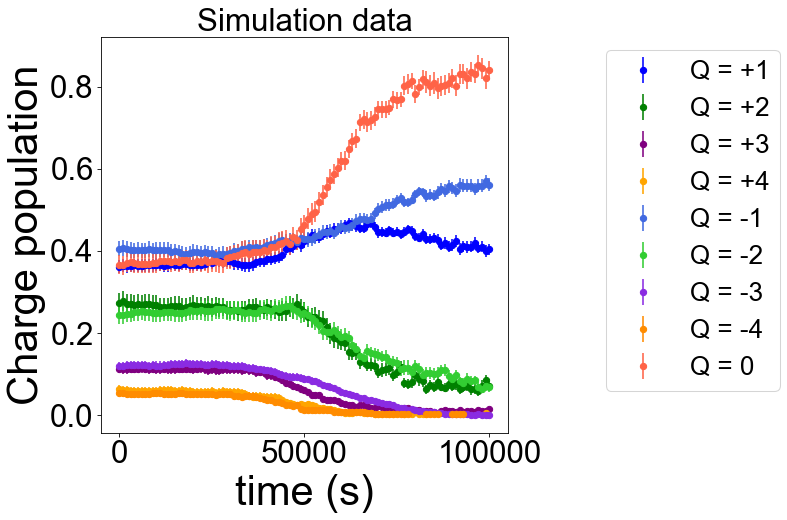

In [16]:
fig, ax1 = plt.subplots(figsize=(7,7))



for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["fraction"],yerr = mtype["err"], fmt ='o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.7, 1))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)
ax1.set_title(f"Simulation data", size = 30)

#v_counts_m.to_csv('FreeBound.dat', sep = "\t")

plt.show()

In [17]:
c = Cairo.groupby(['frame','coordination']).sum()/Cairo.groupby(['frame','coordination']).count()

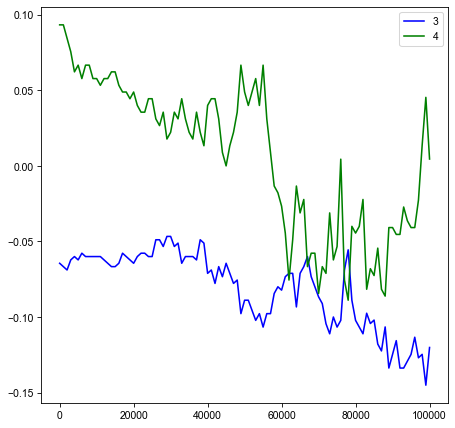

In [18]:
fig, ax1 = plt.subplots(figsize=(7,7))

for typ_m, mtype in c.groupby(['coordination']):
    
    ax1.plot(mtype.index.get_level_values('frame'), mtype["charge"] ,'-', label = typ_m)
    
ax1.legend()

At the end of the simulation the system is negatively charged!!!

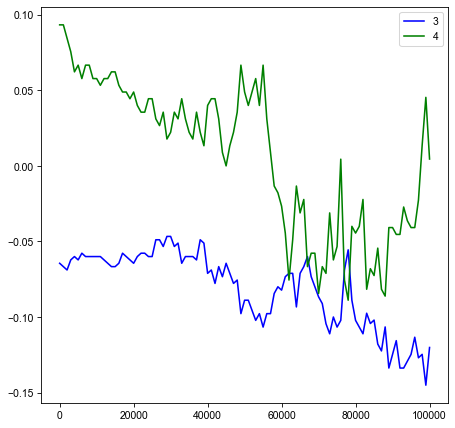

In [19]:
fig, ax1 = plt.subplots(figsize=(7,7))

for typ_m, mtype in c.groupby('coordination'):
    
    ax1.plot(mtype.index.get_level_values('frame'), mtype["charge"] ,'-', label = typ_m)
    
ax1.legend()